### 1. Matplotlib 图像基本概念（figure, axes, plot, show）

Matplotlib 的绘图核心结构如下：

| 概念     | 含义                              |
|----------|-----------------------------------|
| `figure` | 整个画布（相当于一张图）           |
| `axes`   | 图中的子图区域（一个坐标轴系统）   |
| `plot`   | 绘制图线、点等可视元素             |
| `show()` | 显示图像窗口（必要步骤）           |

---

#### ✅ 推荐标准写法（面向对象方式）：

```python
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()
```

> `plt.subplots()` 会返回一个 `figure` 和一个（或多个）`axes`，是最常用的画图框架。


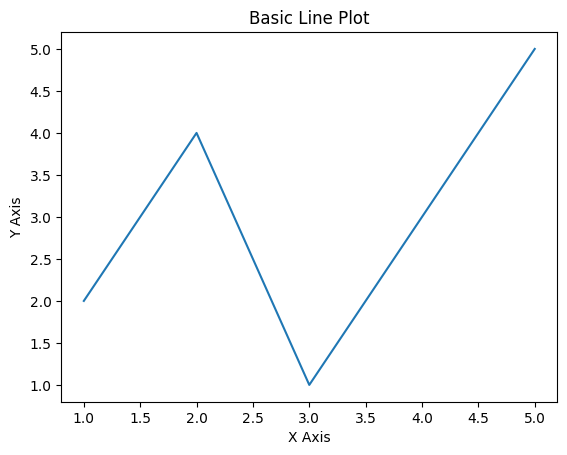

In [1]:
import matplotlib.pyplot as plt

# 构造数据
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# 创建画布和坐标轴
fig, ax = plt.subplots()

# 绘制图像
ax.plot(x, y)

# 添加标题和标签
ax.set_title("Basic Line Plot")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

# 显示图像
plt.show()


### 2. 常用图表类型绘制（plot, bar, scatter, hist）

Matplotlib 提供多种基础图表函数：

| 图类型   | 方法           | 说明                         |
|----------|----------------|------------------------------|
| 折线图   | `ax.plot()`    | 连续数据变化趋势             |
| 柱状图   | `ax.bar()`     | 类别型数据的比较             |
| 散点图   | `ax.scatter()` | 显示两组变量间的分布关系     |
| 直方图   | `ax.hist()`    | 统计频率分布（如分数分布）   |

---

> 所有图都推荐使用 `fig, ax = plt.subplots()` 构建后再调用上述函数进行绘图。


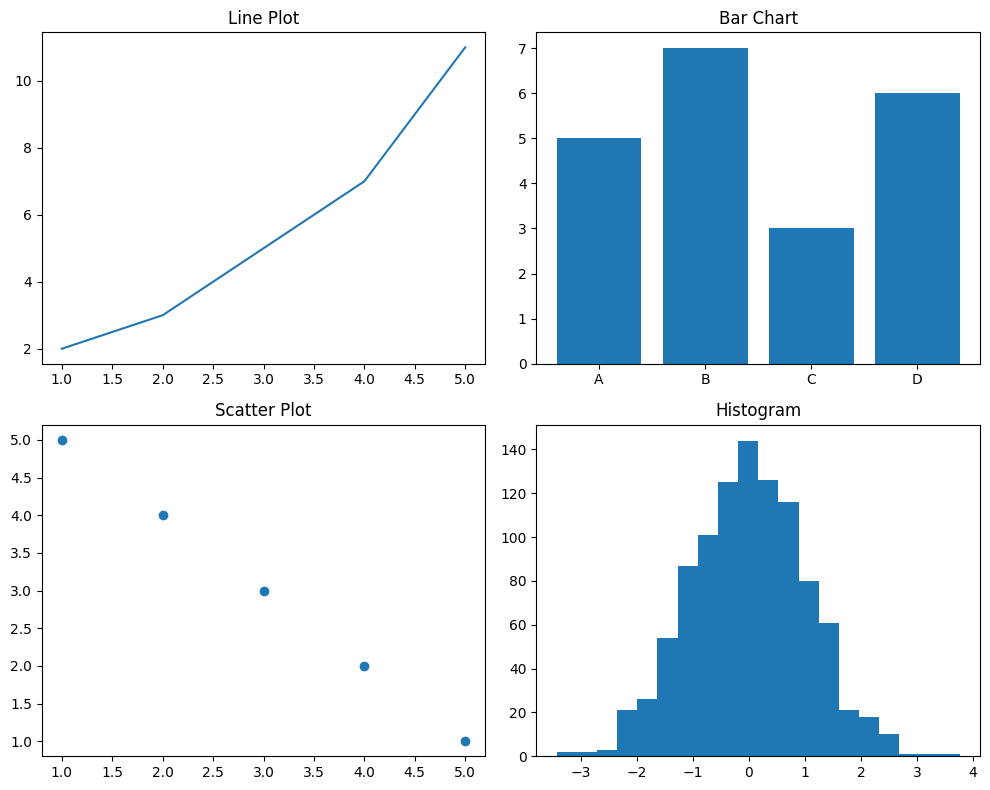

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 折线图 plot
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
axs[0, 0].plot(x, y)
axs[0, 0].set_title("Line Plot")

# 柱状图 bar
categories = ["A", "B", "C", "D"]
values = [5, 7, 3, 6]
axs[0, 1].bar(categories, values)
axs[0, 1].set_title("Bar Chart")

# 散点图 scatter
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
axs[1, 0].scatter(x, y)
axs[1, 0].set_title("Scatter Plot")

# 直方图 hist
import numpy as np
data = np.random.normal(0, 1, 1000)
axs[1, 1].hist(data, bins=20)
axs[1, 1].set_title("Histogram")

plt.tight_layout()
plt.show()


### 3. 自定义颜色、网格、标签、标题

---

#### ✅ 设置线条颜色和样式

```python
ax.plot(x, y, color="red", linestyle="--", linewidth=2)
```

- `color`：颜色名或 hex 码（如 `"blue"`、`"#ff9900"`）
- `linestyle`：`"-"` 实线，`"--"` 虚线，`":"` 点线
- `linewidth`：线宽

---

#### ✅ 设置坐标轴标签和标题

```python
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_title("Main Title")
```

---

#### ✅ 添加网格线

```python
ax.grid(True, linestyle=":", alpha=0.7)
```

---

#### ✅ 添加图例（legend）

```python
ax.plot(x, y, label="Example Line")
ax.legend()
```

> 建议为每条线添加 `label`，再用 `legend()` 显示图例，便于多线图解读。


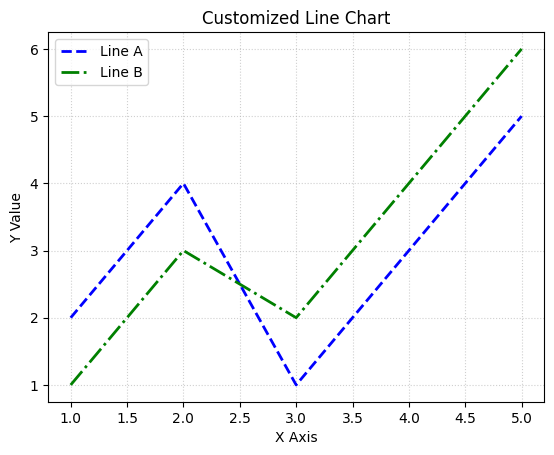

In [3]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [2, 4, 1, 3, 5]
y2 = [1, 3, 2, 4, 6]

fig, ax = plt.subplots()

# 画两条线，设置颜色、样式、图例
ax.plot(x, y1, color="blue", linestyle="--", linewidth=2, label="Line A")
ax.plot(x, y2, color="green", linestyle="-.", linewidth=2, label="Line B")

# 设置标签与标题
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Value")
ax.set_title("Customized Line Chart")

# 添加网格与图例
ax.grid(True, linestyle=":", alpha=0.6)
ax.legend()

plt.show()


### 4. Seaborn 统计图（heatmap, boxplot, violinplot）

Seaborn 常用于展示变量间的关系、分布、类别差异。

| 图类型     | 函数             | 说明                         |
|------------|------------------|------------------------------|
| 热力图     | `sns.heatmap()`  | 显示二维数据的值强度         |
| 箱线图     | `sns.boxplot()`  | 显示数据分布和异常值         |
| 小提琴图   | `sns.violinplot()`| 显示数据分布 + 密度（更细腻）|

---

#### ✅ 热力图（heatmap）适合相关性矩阵、评分矩阵等：

```python
sns.heatmap(data, annot=True, cmap="coolwarm")
```

- `annot=True`：显示数值
- `cmap`：颜色风格

---

#### ✅ 箱线图（boxplot）适合比较不同组的分布：

```python
sns.boxplot(x="类别列", y="数值列", data=df)
```

---

#### ✅ 小提琴图（violinplot）：结合箱线图与密度估计

```python
sns.violinplot(x="类别列", y="数值列", data=df)
```

> Seaborn 默认集成漂亮配色和自动风格，适合统计分析与科研展示。


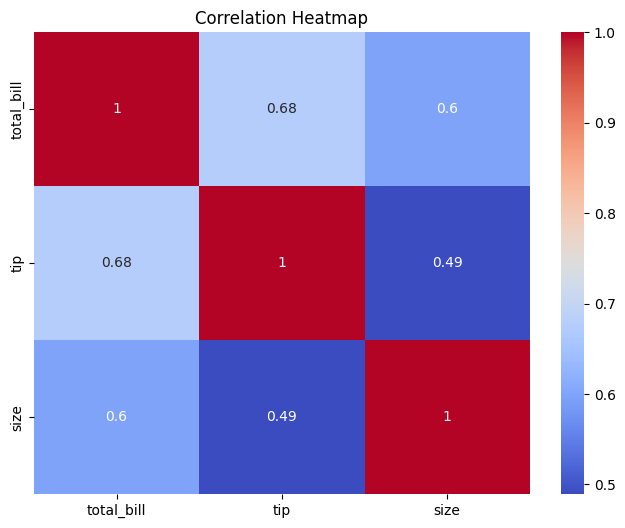

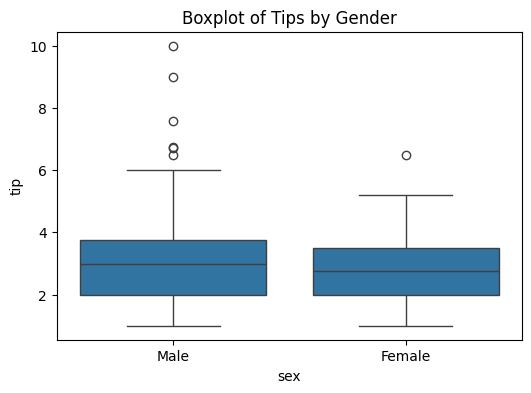

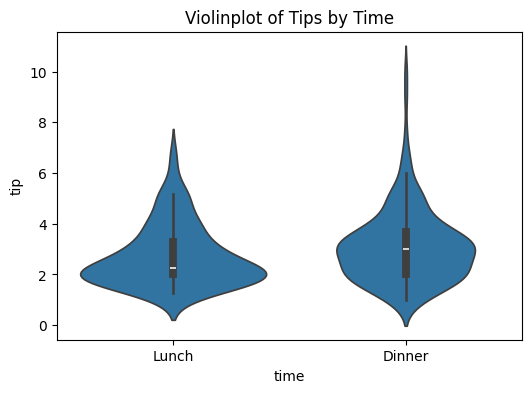

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 示例 DataFrame
df = sns.load_dataset("tips")  # 内置消费数据集

# ✅ 热力图：相关性矩阵
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ✅ 箱线图：不同性别小费分布
plt.figure(figsize=(6, 4))
sns.boxplot(x="sex", y="tip", data=df)
plt.title("Boxplot of Tips by Gender")
plt.show()

# ✅ 小提琴图：不同时间段小费分布密度
plt.figure(figsize=(6, 4))
sns.violinplot(x="time", y="tip", data=df)
plt.title("Violinplot of Tips by Time")
plt.show()


### 5. 3D 可视化（mpl_toolkits.mplot3d）

Matplotlib 支持简单的 3D 可视化，需通过 `Axes3D` 进行初始化。

---

#### ✅ 使用方式：

```python
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
```

---

#### ✅ 常见 3D 图类型：

| 图类型   | 方法              | 描述                         |
|----------|-------------------|------------------------------|
| 3D 折线  | `ax.plot3D()`     | 三维线段                    |
| 3D 散点  | `ax.scatter3D()`  | 三维点集                    |
| 3D 表面  | `ax.plot_surface()`| 三维网格曲面（需 meshgrid） |

> 注意：3D 图较少用于日常分析，但对展示空间结构/轨迹等非常直观。


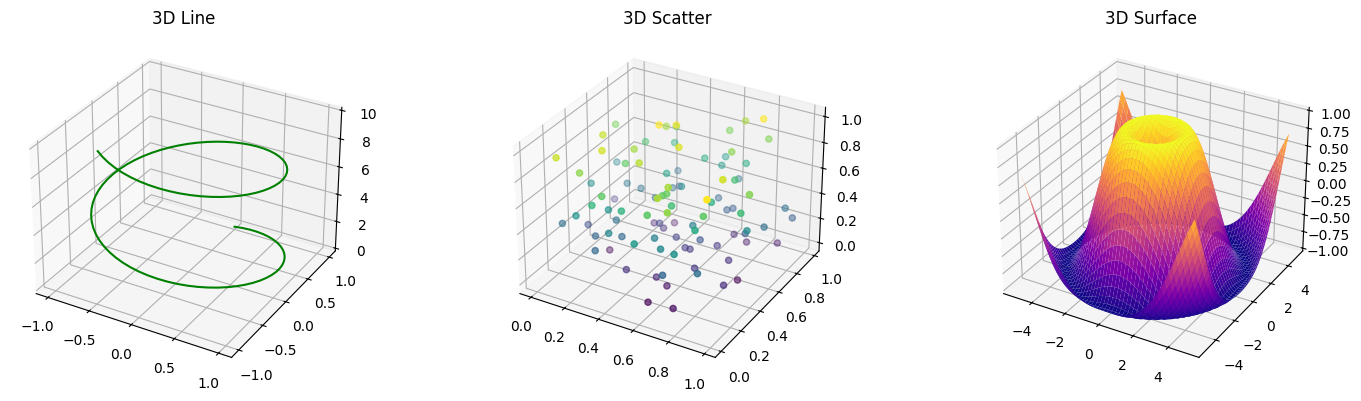

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 4))

# ✅ 3D 折线图
ax1 = fig.add_subplot(131, projection="3d")
z = np.linspace(0, 10, 100)
x = np.sin(z)
y = np.cos(z)
ax1.plot3D(x, y, z, color="green")
ax1.set_title("3D Line")

# ✅ 3D 散点图
ax2 = fig.add_subplot(132, projection="3d")
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
ax2.scatter3D(x, y, z, c=z, cmap="viridis")
ax2.set_title("3D Scatter")

# ✅ 3D 表面图
ax3 = fig.add_subplot(133, projection="3d")
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))
ax3.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none")
ax3.set_title("3D Surface")

plt.tight_layout()
plt.show()
